In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

,asset_1_log_returns,asset_2_log_returns,asset_1_log_returns_lag_0,asset_2_log_returns_lag_0,asset_1_log_returns_lag_1,asset_2_log_returns_lag_1,asset_1_log_returns_lag_2,asset_2_log_returns_lag_2,asset_1_log_returns_lag_3,asset_2_log_returns_lag_3,...,asset_1_log_returns_lag_25,asset_2_log_returns_lag_25,asset_1_log_returns_lag_26,asset_2_log_returns_lag_26,asset_1_log_returns_lag_27,asset_2_log_returns_lag_27,asset_1_log_returns_lag_28,asset_2_log_returns_lag_28,asset_1_log_returns_lag_29,asset_2_log_returns_lag_29
2021-11-03,0.000159,0.001054,0.000268,-0.000450,-0.000351,-0.000411,0.000747,0.001071,-0.000195,0.002852,...,-0.000381,-0.000530,-0.000638,0.000962,0.000548,0.003846,0.000758,0.000590,0.000437,-0.000374
2021-11-04,0.000831,0.001120,0.000159,0.001054,0.000268,-0.000450,-0.000351,-0.000411,0.000747,0.001071,...,0.000635,0.001363,-0.000381,-0.000530,-0.000638,0.000962,0.000548,0.003846,0.000758,0.000590
2021-11-05,-0.000485,0.000384,0.000831,0.001120,0.000159,0.001054,0.000268,-0.000450,-0.000351,-0.000411,...,0.000702,-0.001325,0.000635,0.001363,-0.000381,-0.000530,-0.000638,0.000962,0.000548,0.003846
2021-11-06,0.000315,-0.000637,-0.000485,0.000384,0.000831,0.001120,0.000159,0.001054,0.000268,-0.000450,...,0.000125,0.001908,0.000702,-0.001325,0.000635,0.001363,-0.000381,-0.000530,-0.000638,0.000962
2021-11-07,-0.000572,0.000933,0.000315,-0.000637,-0.000485,0.000384,0.000831,0.001120,0.000159,0.001054,...,0.000253,-0.001218,0.000125,0.001908,0.000702,-0.001325,0.000635,0.001363,-0.000381,-0.000530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-03-15,0.001921,0.002401,0.000015,0.000226,0.000512,-0.000109,0.000070,0.001822,0.000345,0.002894,...,0.000073,0.003084,0.001041,-0.001744,-0.000100,0.000372,0.000046,-0.000355,-0.000794,0.001527
2026-03-16,0.000726,-0.000022,0.001921,0.002401,0.000015,0.000226,0.000512,-0.000109,0.000070,0.001822,...,0.000115,-0.001946,0.000073,0.003084,0.001041,-0.001744,-0.000100,0.000372,0.000046,-0.000355
2026-03-17,0.001212,0.001848,0.000726,-0.000022,0.001921,0.002401,0.000015,0.000226,0.000512,-0.000109,...,0.000784,0.005772,0.000115,-0.001946,0.000073,0.003084,0.001041,-0.001744,-0.000100,0.000372
2026-03-18,0.000468,0.002786,0.001212,0.001848,0.000726,-0.000022,0.001921,0.002401,0.000015,0.000226,...,0.000550,-0.002996,0.000784,0.005772,0.000115,-0.001946,0.000073,0.003084,0.001041,-0.001744


In [2]:
returns=pd.read_parquet("temp_persisted_data/only_features_simulation_gbm")

In [13]:
asset_1_returns=returns[[i for i in returns if "asset_1" in i]]
asset_2_returns=returns[[i for i in returns if "asset_2" in i]]

(array([ 27.,  42., 109., 227., 301., 344., 330., 154.,  38.,  26.]),
 array([-0.52630394, -0.42083142, -0.31535891, -0.20988639, -0.10441388,
         0.00105864,  0.10653115,  0.21200367,  0.31747618,  0.4229487 ,
         0.52842121]),
 <a list of 10 Patch objects>)

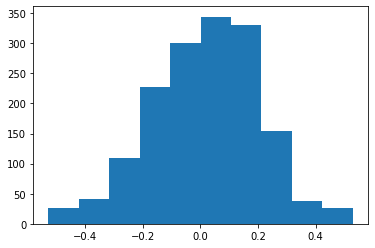

In [23]:
correls=[]
for i in range(asset_1_returns.shape[0]):
    correls.append(np.corrcoef(asset_1_returns.iloc[i].values,asset_2_returns.iloc[i].values)[0,1])

plt.hist(correls)

In [3]:
asset_2_returns=returns[[i for i in returns if "asset_1" in i]]

In [4]:
a2=asset_2_returns.T.reset_index()

In [5]:
a2.index=[i for i in reversed(range(a2.shape[0]))]

In [6]:
a2=a2.sort_index().drop(columns="index")

(array([ 18.,  43., 107., 192., 324., 419., 260., 151.,  64.,  20.]),
 array([-8.25820659, -5.07689076, -1.89557493,  1.2857409 ,  4.46705672,
         7.64837255, 10.82968838, 14.01100421, 17.19232004, 20.37363587,
        23.5549517 ]),
 <a list of 10 Patch objects>)

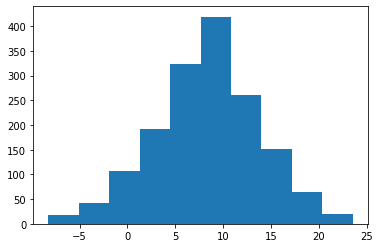

In [7]:
plt.hist((np.exp(a2.sum())-1)/a2.std())

(array([ 20.,  45., 119., 213., 332., 407., 277., 125.,  46.,  14.]),
 array([-0.0410749 , -0.02469349, -0.00831209,  0.00806932,  0.02445073,
         0.04083213,  0.05721354,  0.07359495,  0.08997635,  0.10635776,
         0.12273916]),
 <a list of 10 Patch objects>)

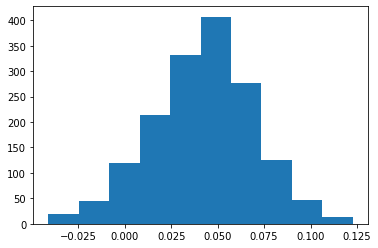

In [8]:
plt.hist(a2.mean()*252)

(array([ 30., 125., 242., 400., 481., 147.,  95.,  50.,  14.,  14.]),
 array([0.00724972, 0.00790517, 0.00856061, 0.00921605, 0.0098715 ,
        0.01052694, 0.01118239, 0.01183783, 0.01249328, 0.01314872,
        0.01380417]),
 <a list of 10 Patch objects>)

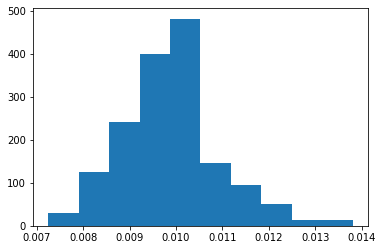

In [9]:
plt.hist(a2.std()*np.sqrt(252))

(array([ 17.,  41., 109., 190., 320., 419., 261., 156.,  64.,  21.]),
 array([-4.23956281, -2.61848568, -0.99740856,  0.62366856,  2.24474569,
         3.86582281,  5.48689993,  7.10797706,  8.72905418, 10.3501313 ,
        11.97120843]),
 <a list of 10 Patch objects>)

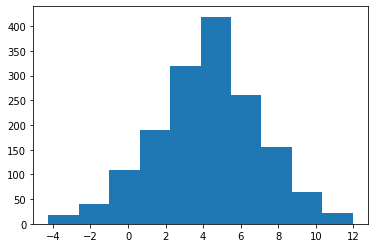

In [10]:
plt.hist(a2.mean()*252/(a2.std()*np.sqrt(252)))

In [24]:
assets_simulation_details={"asset_1":{"method":"GBM","sigma":.01,"mean":.02},
                    "asset_2":{"method":"GBM","sigma":.03,"mean":.18}}

cov=np.array([[assets_simulation_details["asset_1"]["sigma"],0],[0,assets_simulation_details["asset_2"]["sigma"]]])
mus=np.array([assets_simulation_details["asset_1"]["mean"],assets_simulation_details["asset_2"]["mean"]])

In [50]:
ws=np.array([.8,.2])

np.matmul(ws.T,mus)/(np.matmul(np.matmul(ws.T,cov),ws)**(1/2))

0.5964809080634605

In [42]:
np.matmul(ws.T,mus)

0.002

In [51]:
np.matmul(np.matmul(ws.T,cov),ws)

0.007600000000000001